# Description

Generates the figure for top cell types for a specified LV (in Settings section below).

# Modules loading

In [1]:
import re
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from data.recount2 import LVAnalysis
from utils import chunker
import conf

# Settings

In [2]:
LV_NAME = "LV948"

In [3]:
LV_AXIS_THRESHOLD = None  # 3.0
N_TOP_SAMPLES = 400
N_TOP_ATTRS = 15

In [4]:
# OUTPUT_FIGURES_DIR = Path(
#     conf.MANUSCRIPT["FIGURES_DIR"], "lvs_analysis", f"{LV_NAME.lower()}"
# ).resolve()
# display(OUTPUT_FIGURES_DIR)
# OUTPUT_FIGURES_DIR.mkdir(parents=True, exist_ok=True)

In [5]:
# OUTPUT_CELL_TYPE_FILEPATH = OUTPUT_FIGURES_DIR / f"{LV_NAME.lower()}-cell_types.svg"
# display(OUTPUT_CELL_TYPE_FILEPATH)

# Load MultiPLIER summary

In [6]:
multiplier_model_summary = pd.read_pickle(conf.MULTIPLIER["MODEL_SUMMARY_FILE"])

In [7]:
multiplier_model_summary.shape

(2157, 5)

In [8]:
multiplier_model_summary.head()

,pathway,LV index,AUC,p-value,FDR
1,KEGG_LYSINE_DEGRADATION,1,0.388059,0.866078,0.956005
2,REACTOME_MRNA_SPLICING,1,0.733057,0.000048,0.000582
3,MIPS_NOP56P_ASSOCIATED_PRE_RRNA_COMPLEX,1,0.680555,0.001628,0.011366
4,KEGG_DNA_REPLICATION,1,0.549473,0.312155,0.539951
5,PID_MYC_ACTIVPATHWAY,1,0.639303,0.021702,0.083739


# Load data

## Original data

In [9]:
# INPUT_SUBSET = "z_score_std"

In [10]:
# INPUT_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [11]:
# input_filepath = Path(
#     conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
#     INPUT_SUBSET,
#     f"{INPUT_SUBSET}-{INPUT_STEM}.pkl",
# ).resolve()
# display(input_filepath)

# assert input_filepath.exists(), "Input file does not exist"

# input_filepath_stem = input_filepath.stem
# display(input_filepath_stem)

In [12]:
# data = pd.read_pickle(input_filepath)

In [13]:
# data.shape

In [14]:
# data.head()

## LV data

In [15]:
# lv_obj = LVAnalysis(LV_NAME, data)
lv_obj = LVAnalysis(LV_NAME)

In [16]:
multiplier_model_summary[
    multiplier_model_summary["LV index"].isin((LV_NAME[2:],))
    & (
        (multiplier_model_summary["FDR"] < 0.05)
        | (multiplier_model_summary["AUC"] >= 0.75)
    )
]

,pathway,LV index,AUC,p-value,FDR


In [17]:
lv_data = lv_obj.get_experiments_data()

SRP060416, SRP057196, SRP014428, SRP055569, SRP033135, SRP018853, SRP013363, SRP042161, SRP066834, SRP024244, SRP050499, SRP009247, SRP045711, SRP012461, SRP036821, SRP055153, SRP064464, 

In [18]:
lv_data.shape

(4870, 41)

In [19]:
lv_data.head()

tonsil donor facs gating                     cell type  \
project   run                                                                 
SRP060416 SRR2088096    Donor T74          NK  tonsil Innate lymphoid cells   
          SRR2088128    Donor T74        ILC3  tonsil Innate lymphoid cells   
          SRR2088153    Donor T75        ILC3  tonsil Innate lymphoid cells   
          SRR2088179    Donor T75        ILC3  tonsil Innate lymphoid cells   
          SRR2088205    Donor T75        ILC3  tonsil Innate lymphoid cells   

                     tissue  age c1 chip id experiment_sample_name cell line  \
project   run                                                                  
SRP060416 SRR2088096    NaN  NaN        NaN                    NaN       NaN   
          SRR2088128    NaN  NaN        NaN                    NaN       NaN   
          SRR2088153    NaN  NaN        NaN                    NaN       NaN   
          SRR2088179    NaN  NaN        NaN                    NaN       NaN   
          SRR2088205    NaN  NaN        NaN                    NaN       NaN   

                     sample type hour post serum-switch  ...  \
project   run                                            ...   
SRP060416 SRR2088096         NaN                    NaN  ...   
          SRR2088128         NaN                    NaN  ...   
          SRR2088153         NaN                    NaN  ...   
          SRR2088179         NaN                    NaN  ...   
          SRR2088205         NaN                    NaN  ...   

                     patient code name tissue subtype tissue archive method  \
project   run                                                                 
SRP060416 SRR2088096               NaN            NaN                   NaN   
          SRR2088128               NaN            NaN                   NaN   
          SRR2088153               NaN            NaN                   NaN   
          SRR2088179               NaN            NaN                   NaN   
          SRR2088205               NaN            NaN                   NaN   

                     source assigned cell type qc pass cell count ercc_mix  \
project   run                                                                
SRP060416 SRR2088096    NaN                NaN     NaN        NaN      NaN   
          SRR2088128    NaN                NaN     NaN        NaN      NaN   
          SRR2088153    NaN                NaN     NaN        NaN      NaN   
          SRR2088179    NaN                NaN     NaN        NaN      NaN   
          SRR2088205    NaN                NaN     NaN        NaN      NaN   

                     ercc_dilution     LV948  
project   run                                 
SRP060416 SRR2088096           NaN -0.035633  
          SRR2088128           NaN  0.114710  
          SRR2088153           NaN  0.297828  
          SRR2088179           NaN  0.309819  
          SRR2088205           NaN  0.186832  

[5 rows x 41 columns]

# LV cell types analysis

## Get top attributes

In [20]:
lv_attrs = lv_obj.get_attributes_variation_score()
display(lv_attrs.head(20))

tonsil donor                   0.141986
facs gating                    0.141986
cell sorted                    0.039762
time in culture                0.039762
cell type                      0.039389
culture medium                 0.004221
cell line stably expressing    0.004221
par-clip antibody              0.004221
experiment_sample_name         0.002718
c1 chip id                     0.002718
age                            0.002718
isolate                        0.002407
brain region                   0.002407
tissue                         0.001968
cell count                     0.001612
ercc_mix                       0.001612
assigned cell type             0.001612
qc pass                        0.001612
ercc_dilution                  0.001612
Stage                          0.001534
dtype: float64

In [21]:
# show those with cell type or tissue in their name
_tmp = pd.Series(lv_attrs.index)
lv_attrs[
    _tmp.str.match(
        "(?:cell.+type$)|(?:tissue$)|(?:tissue.+type$)",
        case=False,
        flags=re.IGNORECASE,
    ).values
].sort_values(ascending=False)

cell type         0.039389
tissue            0.001968
tissue subtype    0.001159
dtype: float64

In [24]:
_tmp = lv_data.loc[
    :,
    [
        "cell type",
        "cell line",
        "facs gating",
        "tissue",
        "cell sorted",
        LV_NAME,
    ],
]

In [25]:
_tmp_seq = list(chunker(_tmp.sort_values(LV_NAME, ascending=False), 25))

In [34]:
_tmp_seq[8]

cell type cell line facs gating  \
project   run                                                              
SRP060416 SRR2088188  tonsil Innate lymphoid cells       NaN        ILC3   
          SRR2088681  tonsil Innate lymphoid cells       NaN        ILC3   
          SRR2088309  tonsil Innate lymphoid cells       NaN        ILC2   
          SRR2088338  tonsil Innate lymphoid cells       NaN        ILC2   
          SRR2088196  tonsil Innate lymphoid cells       NaN        ILC3   
          SRR2088399  tonsil Innate lymphoid cells       NaN        ILC1   
          SRR2088240  tonsil Innate lymphoid cells       NaN        ILC3   
          SRR2088246  tonsil Innate lymphoid cells       NaN        ILC3   
          SRR2088263  tonsil Innate lymphoid cells       NaN        ILC3   
          SRR2088259  tonsil Innate lymphoid cells       NaN        ILC3   
          SRR2088452  tonsil Innate lymphoid cells       NaN        ILC3   
          SRR2088699  tonsil Innate lymphoid cells       NaN        ILC3   
          SRR2088657  tonsil Innate lymphoid cells       NaN        ILC3   
          SRR2088668  tonsil Innate lymphoid cells       NaN        ILC3   
SRP057196 SRR1974857                    astrocytes       NaN         NaN   
SRP060416 SRR2088127  tonsil Innate lymphoid cells       NaN        ILC3   
          SRR2088476  tonsil Innate lymphoid cells       NaN        ILC3   
          SRR2088216  tonsil Innate lymphoid cells       NaN        ILC3   
          SRR2088471  tonsil Innate lymphoid cells       NaN        ILC3   
          SRR2088185  tonsil Innate lymphoid cells       NaN        ILC3   
          SRR2088314  tonsil Innate lymphoid cells       NaN        ILC2   
          SRR2088462  tonsil Innate lymphoid cells       NaN        ILC3   
          SRR2088458  tonsil Innate lymphoid cells       NaN        ILC3   
          SRR2088685  tonsil Innate lymphoid cells       NaN        ILC3   
          SRR2088239  tonsil Innate lymphoid cells       NaN        ILC3   

                      tissue cell sorted     LV948  
project   run                                       
SRP060416 SRR2088188     NaN         NaN  0.418437  
          SRR2088681     NaN         NaN  0.417537  
          SRR2088309     NaN         NaN  0.414242  
          SRR2088338     NaN         NaN  0.408121  
          SRR2088196     NaN         NaN  0.402225  
          SRR2088399     NaN         NaN  0.400154  
          SRR2088240     NaN         NaN  0.399254  
          SRR2088246     NaN         NaN  0.386941  
          SRR2088263     NaN         NaN  0.380503  
          SRR2088259     NaN         NaN  0.377724  
          SRR2088452     NaN         NaN  0.375719  
          SRR2088699     NaN         NaN  0.373098  
          SRR2088657     NaN         NaN  0.370283  
          SRR2088668     NaN         NaN  0.370199  
SRP057196 SRR1974857  cortex         NaN  0.367792  
SRP060416 SRR2088127     NaN         NaN  0.366796  
          SRR2088476     NaN         NaN  0.363387  
          SRR2088216     NaN         NaN  0.361796  
          SRR2088471     NaN         NaN  0.360044  
          SRR2088185     NaN         NaN  0.356133  
          SRR2088314     NaN         NaN  0.353734  
          SRR2088462     NaN         NaN  0.349822  
          SRR2088458     NaN         NaN  0.348267  
          SRR2088685     NaN         NaN  0.347594  
          SRR2088239     NaN         NaN  0.347474

In [36]:
# what is there in these projects?
lv_data.loc[["SRP057196"]].dropna(how="all", axis=1).sort_values(
    LV_NAME, ascending=False
).sort_values(LV_NAME, ascending=False).head(10)

cell type  tissue                 age  \
project   run                                                         
SRP057196 SRR1974857         astrocytes  cortex  postnatal 47 years   
          SRR1974767            neurons  cortex  postnatal 63 years   
          SRR1974872            neurons  cortex  postnatal 47 years   
          SRR1974979    fetal_quiescent  cortex    prenatal 16-18 W   
          SRR1974880  fetal_replicating  cortex    prenatal 16-18 W   
          SRR1974761        endothelial  cortex  postnatal 63 years   
          SRR1974624            neurons  cortex  postnatal 37 years   
          SRR1974898    fetal_quiescent  cortex    prenatal 16-18 W   
          SRR1974971    fetal_quiescent  cortex    prenatal 16-18 W   
          SRR1974603            neurons  cortex  postnatal 37 years   

                      c1 chip id experiment_sample_name     LV948  
project   run                                                      
SRP057196 SRR1974857   nochipID9                  AB_S1  0.367792  
          SRR1974767   nochipID3                  AB_S5  0.341725  
          SRR1974872   nochipID9                  AB_S1  0.186385  
          SRR1974979  nochipID13                  FB_S3  0.157537  
          SRR1974880  nochipID10                  FB_S1  0.125334  
          SRR1974761   nochipID3                  AB_S5  0.121764  
          SRR1974624  1772078236                 AB_S11  0.116473  
          SRR1974898  nochipID10                  FB_S1  0.104679  
          SRR1974971  nochipID13                  FB_S3  0.098580  
          SRR1974603  1772078236                 AB_S11  0.098344

In [37]:
SELECTED_ATTRIBUTE = "cell type"

In [38]:
# it has to be in the order desired for filling nans in the SELECTED_ATTRIBUTE
SECOND_ATTRIBUTES = ["tissue"]

## Get plot data

In [39]:
plot_data = lv_data.loc[:, [SELECTED_ATTRIBUTE] + SECOND_ATTRIBUTES + [LV_NAME]]

In [40]:
# if blank/nan, fill cell type column with tissue content
_new_column = plot_data[[SELECTED_ATTRIBUTE] + SECOND_ATTRIBUTES].fillna(
    method="backfill", axis=1
)[SELECTED_ATTRIBUTE]
plot_data[SELECTED_ATTRIBUTE] = _new_column
plot_data = plot_data.drop(columns=SECOND_ATTRIBUTES)
plot_data = plot_data.fillna({SELECTED_ATTRIBUTE: "NOT CATEGORIZED"})
# plot_data = plot_data.dropna(subset=[SELECTED_ATTRIBUTE])

In [41]:
plot_data = plot_data.sort_values(LV_NAME, ascending=False)

In [42]:
plot_data.head(20)

cell type     LV948
project   run                                               
SRP060416 SRR2088191  tonsil Innate lymphoid cells  2.573508
          SRR2088107  tonsil Innate lymphoid cells  2.172393
          SRR2088237  tonsil Innate lymphoid cells  1.828542
          SRR2088099  tonsil Innate lymphoid cells  1.581172
          SRR2088182  tonsil Innate lymphoid cells  1.506301
          SRR2088189  tonsil Innate lymphoid cells  1.464860
          SRR2088146  tonsil Innate lymphoid cells  1.430411
          SRR2088276  tonsil Innate lymphoid cells  1.404662
          SRR2088129  tonsil Innate lymphoid cells  1.372129
          SRR2088208  tonsil Innate lymphoid cells  1.301686
          SRR2088134  tonsil Innate lymphoid cells  1.196603
          SRR2088165  tonsil Innate lymphoid cells  1.195534
          SRR2088100  tonsil Innate lymphoid cells  1.185359
          SRR2088119  tonsil Innate lymphoid cells  1.160231
          SRR2088112  tonsil Innate lymphoid cells  1.137457
          SRR2088162  tonsil Innate lymphoid cells  1.128935
          SRR2088084  tonsil Innate lymphoid cells  1.092478
          SRR2088490  tonsil Innate lymphoid cells  1.082059
          SRR2088122  tonsil Innate lymphoid cells  1.072699
          SRR2088101  tonsil Innate lymphoid cells  1.047875

## Customize x-axis values

When cell type values are not very clear, customize their names by looking at their specific studies to know exactly what the authors meant.

In [43]:
final_plot_data = plot_data.replace(
    {
        SELECTED_ATTRIBUTE: {
            # "normal skin": "Skin",
            # "liver": "Liver",
            # "Human Skeletal Muscle Myoblasts (HSMM)": "Skeletal muscle myoblasts",
            # "astrocytes": "Astrocytes",
            # "mixture of U87 human glioma cells and MCF10a human breast cancer cells": "Glioma + MCF10 breast cancer cells",
            # "mixture of U87 human glioma cells and WI-38 human lung fibroblast cells": "Glioma + WI-38 lung fibroblast cells",
            # "functional hepatocytes generated by lineage reprogramming": "Hepatocytes",
            # "human adipose-derived stem cells": "Adipose-derived stem cells",
            # "adipose": "Adipose",
            # "embryonic stem cells": "Embryonic stem cells",
            # "primary keratinocytes": "Primary keratinocytes",
            # "fetal liver": "Fetal liver",
            # "in vitro differentiated erythroid cells": "Erythroid cells",
            # "WAT": "White adipose tissue",
            # "BAT": "Brown adipose tissue",
            # "Uninvolved Breast Tissue Adjacent to ER+ Primary Tumor": "Breast tissue adjacent to ER+ tumor",
            # "ovarian granulosa cells": "Ovarian granulosa cells",
        }
    }
)

In [44]:
# sorte index to avoid PerformanceWarning from pandas
final_plot_data = final_plot_data.sort_index()

In [45]:
_srp_code = "SRP060416"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: x[SELECTED_ATTRIBUTE]
    + f" ({lv_data.loc[(_srp_code, x.name), 'facs gating']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [46]:
# # take the top samples only
# final_plot_data = final_plot_data.sort_values(LV_NAME, ascending=False)[:N_TOP_SAMPLES]

## Threshold LV values

In [47]:
if LV_AXIS_THRESHOLD is not None:
    final_plot_data.loc[
        final_plot_data[LV_NAME] > LV_AXIS_THRESHOLD, LV_NAME
    ] = LV_AXIS_THRESHOLD

## Delete samples with no tissue/cell type information

In [48]:
# final_plot_data = final_plot_data[
#     final_plot_data[SELECTED_ATTRIBUTE] != "NOT CATEGORIZED"
# ]

## Set x-axis order

In [49]:
attr_order = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .median()
    .sort_values(LV_NAME, ascending=False)
    .index[:N_TOP_ATTRS]
    .tolist()
)

In [50]:
len(attr_order)

15

In [51]:
attr_order[:5]

['tonsil Innate lymphoid cells (ILC3)',
 'leukocyte from blood of healthy individual',
 'tonsil Innate lymphoid cells (ILC2)',
 'NG2-sorted cell from blood of melanoma patient',
 'CD4+CD25highCD127low/- Treg cells']

## Plot

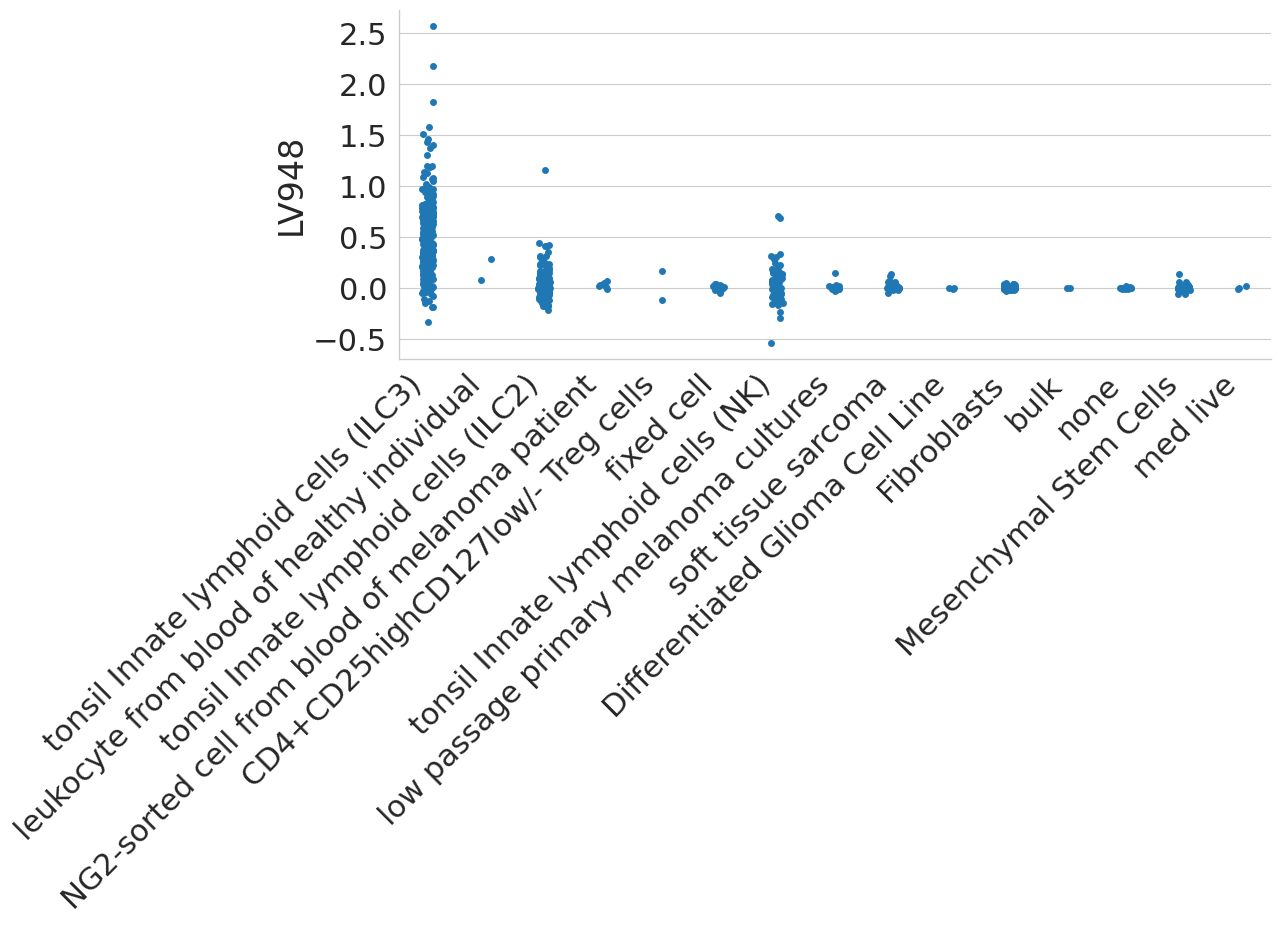

In [52]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=final_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="strip",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )

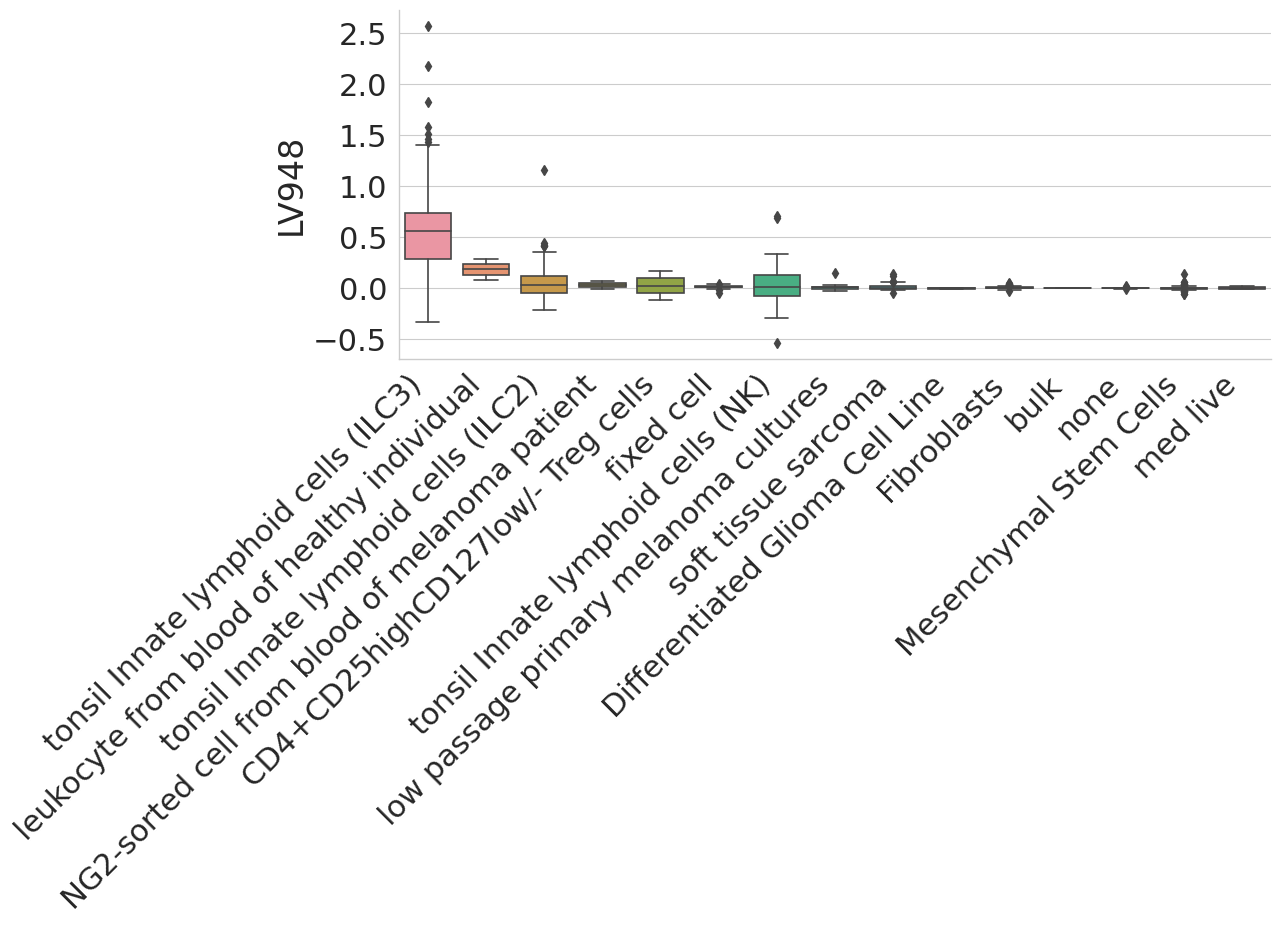

In [53]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=final_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="box",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )

# Debug

In [54]:
# with pd.option_context(
#     "display.max_rows", None, "display.max_columns", None, "display.max_colwidth", None
# ):
#     _tmp = final_plot_data[final_plot_data[SELECTED_ATTRIBUTE].str.contains("NOT CAT")]
#     display(_tmp.head(20))

In [55]:
# # what is there in these projects?
# _tmp = lv_data.loc[["SRP002605"]].dropna(how="all", axis=1).sort_values(
#     LV_NAME, ascending=False
# )

# display(_tmp.head(60))

# Reduced plot

## Data stats

In [56]:
plot_data_stats = final_plot_data.describe()[LV_NAME]
display(plot_data_stats)

count    4870.000000
mean        0.025346
std         0.171533
min        -0.538284
25%        -0.031916
50%        -0.009127
75%         0.011598
max         2.573508
Name: LV948, dtype: float64

In [57]:
plot_data_stats_by_cell_type = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .describe()[LV_NAME]
    .sort_values("50%", ascending=False)
)
display(plot_data_stats_by_cell_type)

,count,mean,std,min,25%,50%,75%,max
cell type,,,,,,,,
tonsil Innate lymphoid cells (ILC3),307.0,0.535780,0.367815,-0.335836,0.288173,0.555164,0.735615,2.573508
leukocyte from blood of healthy individual,2.0,0.181373,0.142462,0.080637,0.131005,0.181373,0.231740,0.282108
tonsil Innate lymphoid cells (ILC2),137.0,0.051628,0.162622,-0.215102,-0.045281,0.029412,0.118502,1.160231
NG2-sorted cell from blood of melanoma patient,6.0,0.026764,0.026107,-0.006339,0.009608,0.024752,0.043513,0.063092
CD4+CD25highCD127low/- Treg cells,2.0,0.022694,0.199404,-0.118305,-0.047806,0.022694,0.093194,0.163694
fixed cell,14.0,0.009433,0.024067,-0.052212,0.006719,0.012474,0.019663,0.042677
tonsil Innate lymphoid cells (NK),74.0,0.035219,0.182637,-0.538284,-0.074985,0.011516,0.122757,0.704060
low passage primary melanoma cultures,16.0,0.009195,0.038140,-0.026581,-0.009493,0.004274,0.012703,0.141645
soft tissue sarcoma,45.0,0.013193,0.034046,-0.048424,-0.006108,0.003226,0.019832,0.138857


In [58]:
# keep cell types whose median is larger than the global median
selected_cell_types = plot_data_stats_by_cell_type[
    (plot_data_stats_by_cell_type["50%"] > max(plot_data_stats.loc["50%"], 0.0))
].index
display(selected_cell_types)

Index(['tonsil Innate lymphoid cells (ILC3)',
       'leukocyte from blood of healthy individual',
       'tonsil Innate lymphoid cells (ILC2)',
       'NG2-sorted cell from blood of melanoma patient',
       'CD4+CD25highCD127low/- Treg cells', 'fixed cell',
       'tonsil Innate lymphoid cells (NK)',
       'low passage primary melanoma cultures', 'soft tissue sarcoma',
       'Differentiated Glioma Cell Line'],
      dtype='object', name='cell type')

In [59]:
final_plot_data.shape

(4870, 2)

In [60]:
final_plot_data = final_plot_data[
    final_plot_data[SELECTED_ATTRIBUTE].isin(selected_cell_types)
]

In [61]:
final_plot_data.shape

(606, 2)

## Set x-axis order

In [62]:
attr_order = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .median()
    .sort_values(LV_NAME, ascending=False)
    .index[:N_TOP_ATTRS]
    .tolist()
)

In [63]:
len(attr_order)

10

In [64]:
attr_order[:5]

['tonsil Innate lymphoid cells (ILC3)',
 'leukocyte from blood of healthy individual',
 'tonsil Innate lymphoid cells (ILC2)',
 'NG2-sorted cell from blood of melanoma patient',
 'CD4+CD25highCD127low/- Treg cells']

## Plot

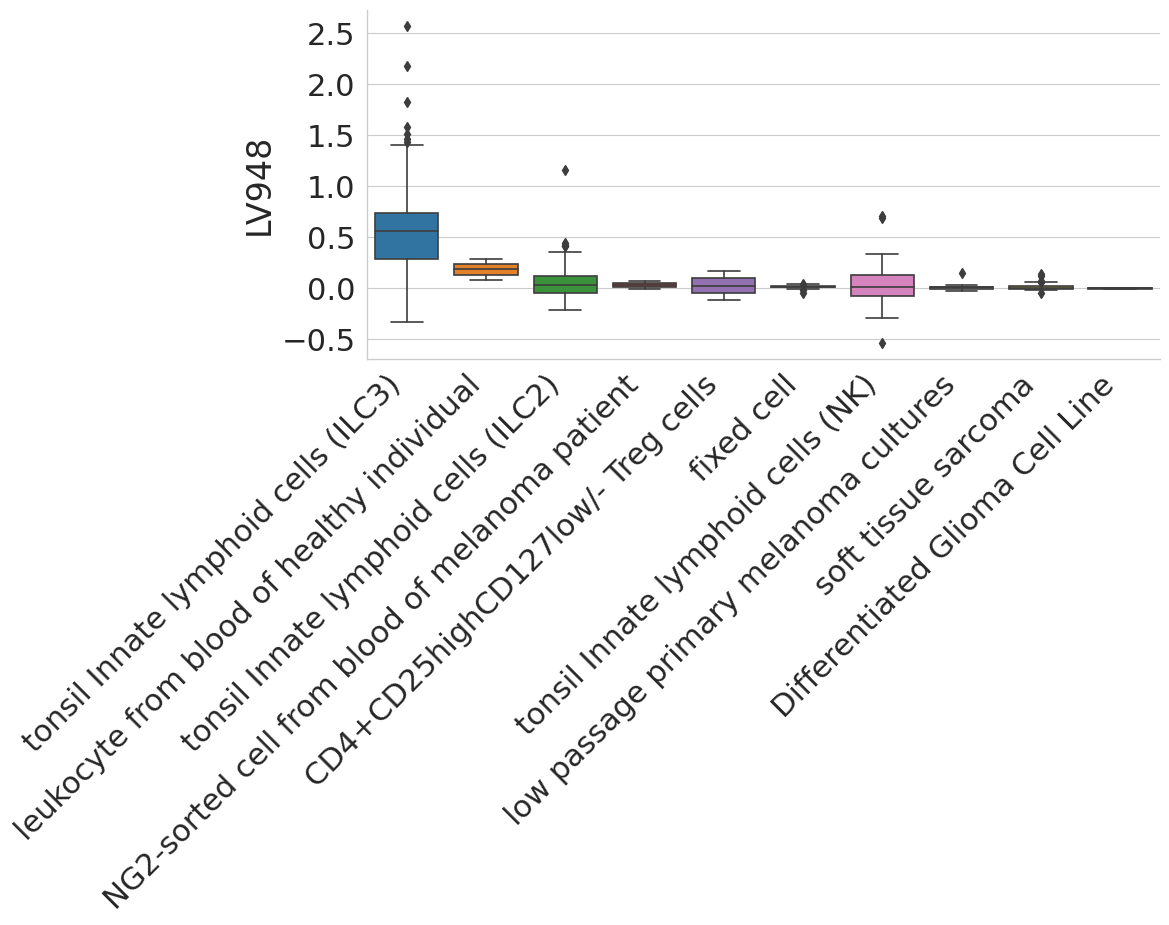

In [65]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=final_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="box",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )